In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Load the dataset into python environment

In [ ]:
df=pd.read_csv('/content/titanic_dataset .csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Do all the necessary pre-processing steps

Understanding the dataset

In [ ]:
df.set_index('PassengerId',inplace=True)

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.shape

(891, 11)

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Finding missing values

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

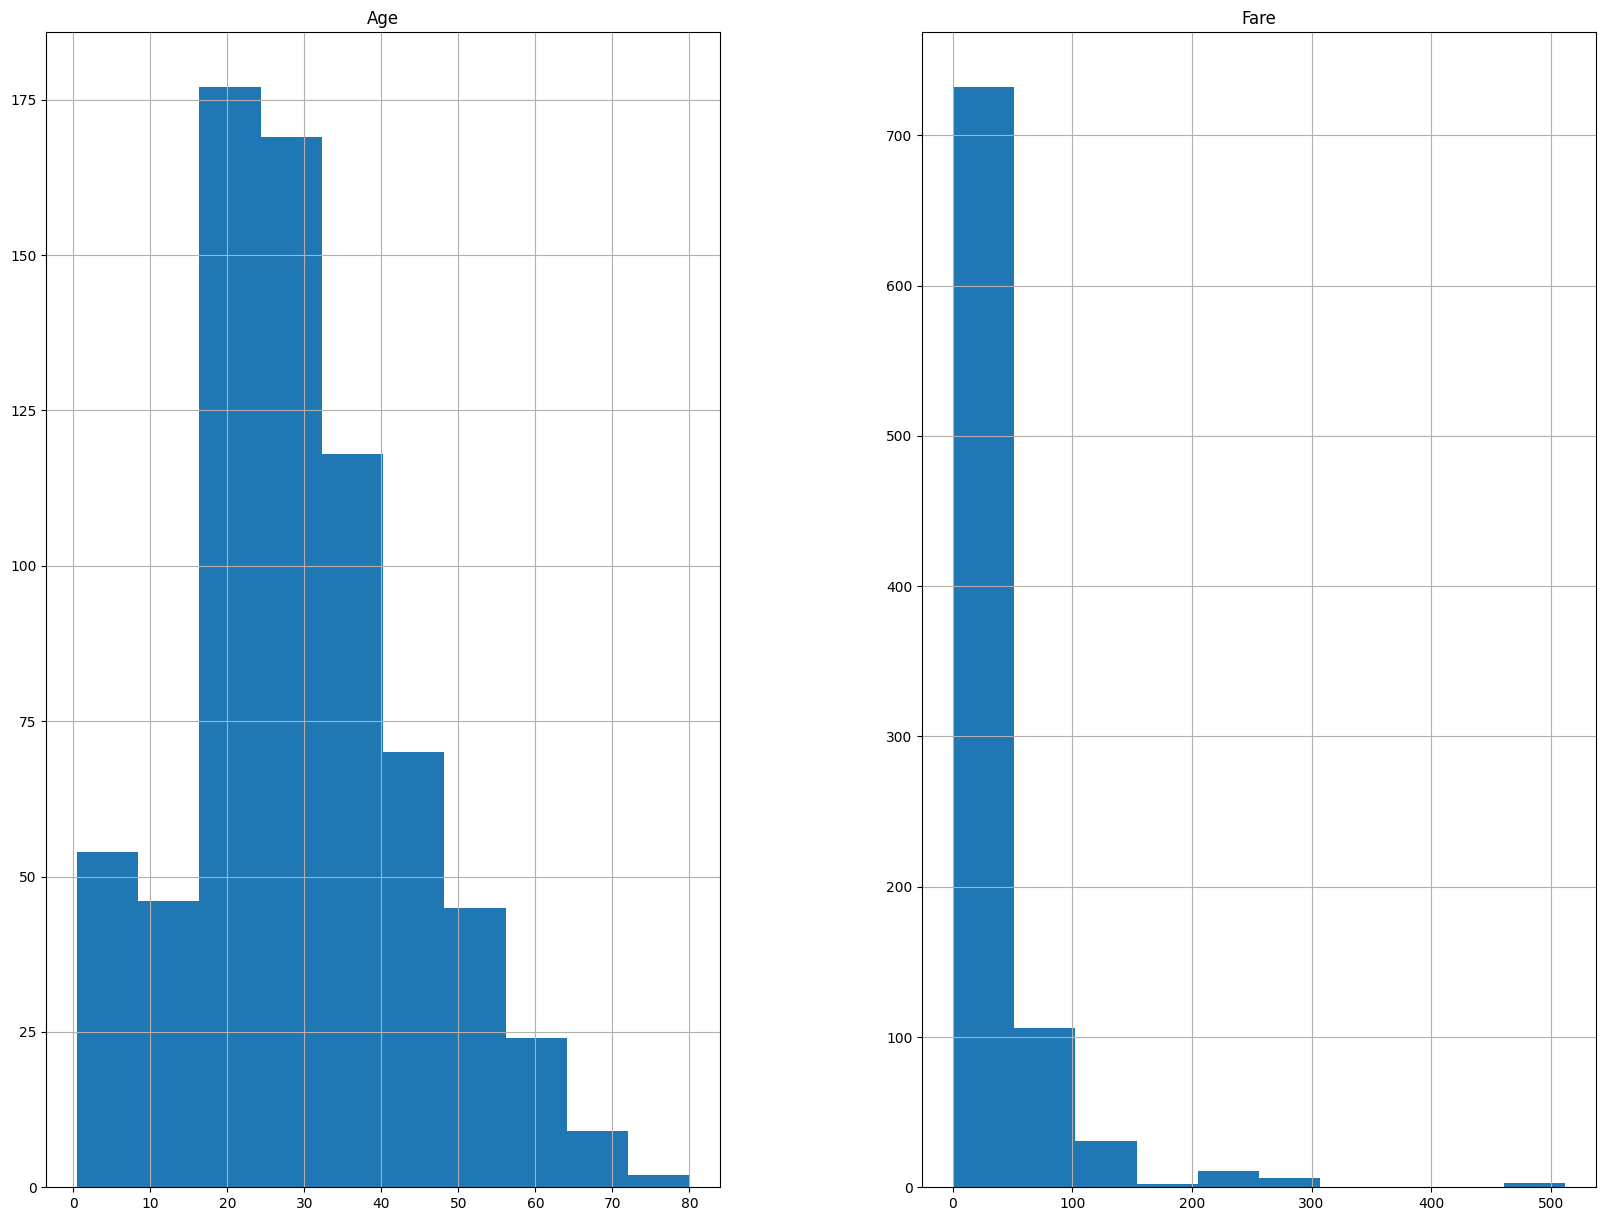

In [ ]:
freq_graph = df.select_dtypes('float64','int64')
freq_graph.hist(figsize=(20,15));

Filling Missing Values

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Finding Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
num_columns=['Survived','Pclass','Age','SibSp','Parch','Fare']

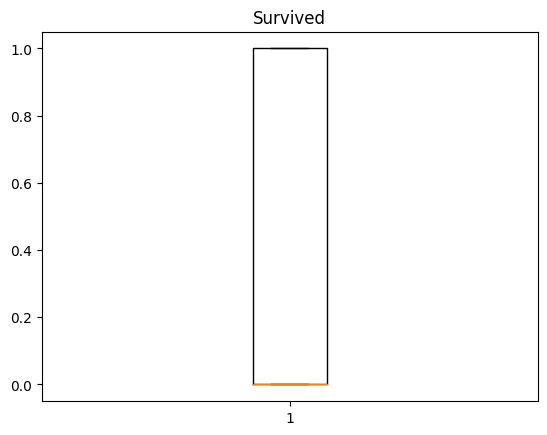

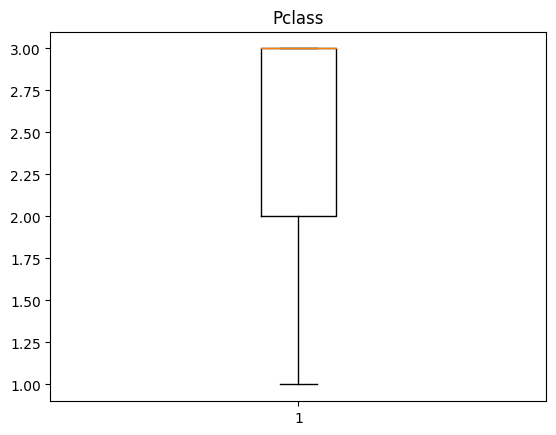

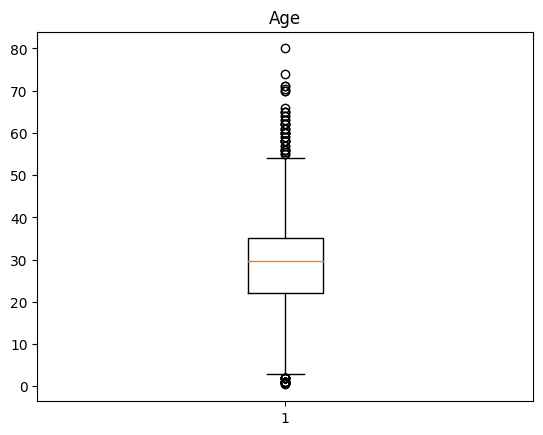

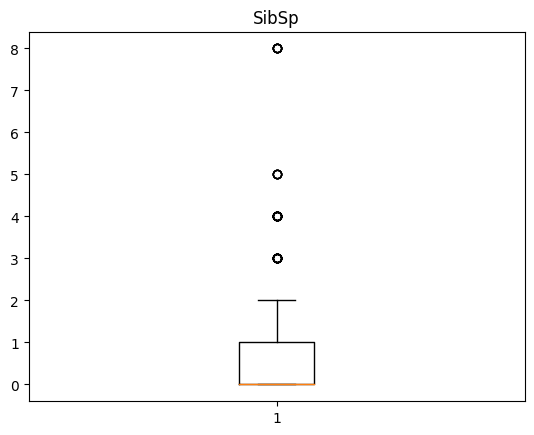

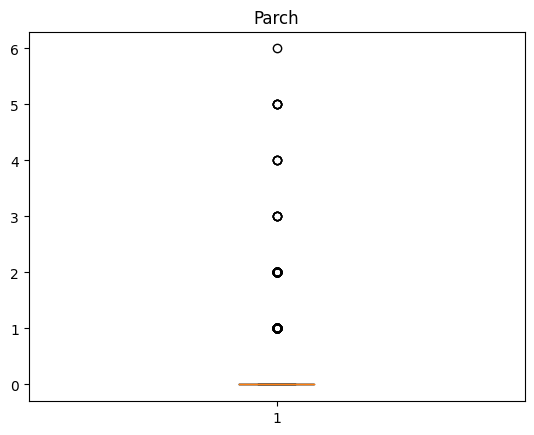

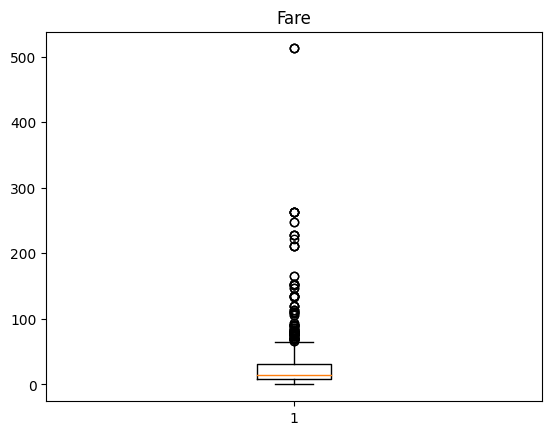

In [ ]:
for i in num_columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i)

In [ ]:
# For Age

Q1=np.percentile(df['Age'],25,method='midpoint')
Q2=np.percentile(df['Age'],50,method='midpoint')
Q3=np.percentile(df['Age'],75,method='midpoint')

print('Q1 is  ',Q1)
print('Q2 is  ', Q2)
print('Q3 is  ', Q3)

IQR = Q3-Q1
print(IQR)

Q1 is   22.0
Q2 is   29.69911764705882
Q3 is   35.0
13.0


In [ ]:
lower_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

print('lower whisker is ',lower_lim)
print('upper whisker is ',Up_lim)

lower whisker is  2.5
upper whisker is  54.5


In [ ]:
outliers=[]
for x in df['Age']:
  if (x<lower_lim) or (x>Up_lim):
    outliers.append(x)
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [ ]:
df['Age']=df['Age'].clip(lower=lower_lim, upper=Up_lim)

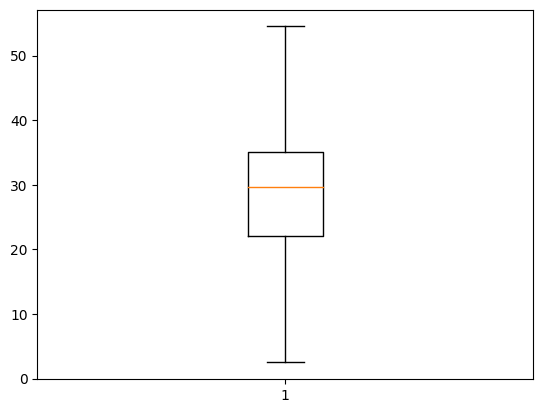

In [ ]:
plt.boxplot(df['Age'])
plt.show();

In [ ]:
# SibSp
Q1=np.percentile(df['SibSp'],25,method='midpoint')
Q2=np.percentile(df['SibSp'],50,method='midpoint')
Q3=np.percentile(df['SibSp'],75,method='midpoint')

print('Q1 is  ',Q1)
print('Q2 is  ', Q2)
print('Q3 is  ', Q3)

IQR = Q3-Q1
print(IQR)

Q1 is   0.0
Q2 is   0.0
Q3 is   1.0
1.0


In [ ]:
lower_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

print('lower whisker is ',lower_lim)
print('upper whisker is ',Up_lim)

lower whisker is  -1.5
upper whisker is  2.5


In [ ]:
outliers=[]
for x in df['Age']:
  if (x<lower_lim) or (x>Up_lim):
    outliers.append(x)
print(outliers)

[22.0, 38.0, 26.0, 35.0, 35.0, 29.69911764705882, 54.0, 27.0, 14.0, 4.0, 54.5, 20.0, 39.0, 14.0, 54.5, 29.69911764705882, 31.0, 29.69911764705882, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, 29.69911764705882, 19.0, 29.69911764705882, 29.69911764705882, 40.0, 29.69911764705882, 29.69911764705882, 54.5, 28.0, 42.0, 29.69911764705882, 21.0, 18.0, 14.0, 40.0, 27.0, 29.69911764705882, 3.0, 19.0, 29.69911764705882, 29.69911764705882, 29.69911764705882, 29.69911764705882, 18.0, 7.0, 21.0, 49.0, 29.0, 54.5, 29.69911764705882, 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, 29.69911764705882, 29.69911764705882, 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, 29.69911764705882, 29.69911764705882, 30.0, 22.0, 29.0, 29.69911764705882, 28.0, 17.0, 33.0, 16.0, 29.69911764705882, 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 54.5, 29.69911764705882, 54.5, 23.0, 34.0, 34.0, 28.0, 29.69911764705882, 21.0, 33.0, 37.0, 28.0, 21.0, 29.69911764705882, 38.0, 29.69911764705882, 47.0, 14.5, 22.0, 20.0, 17.0, 21.0, 54

In [ ]:
df['SibSp']=df['SibSp'].clip(lower=lower_lim, upper=Up_lim)

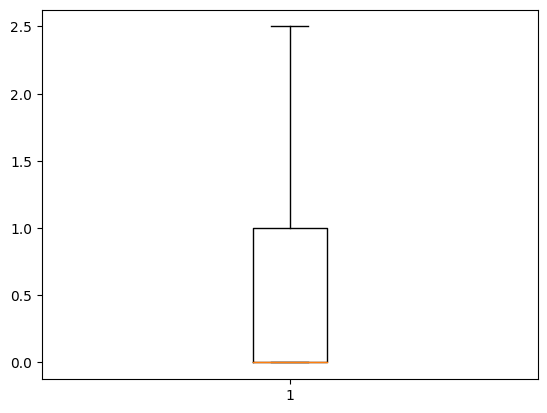

In [ ]:
plt.boxplot(df['SibSp'])
plt.show();

In [ ]:
# For Parch
Q1=np.percentile(df['Parch'],25,method='midpoint')
Q2=np.percentile(df['Parch'],50,method='midpoint')
Q3=np.percentile(df['Parch'],75,method='midpoint')

print('Q1 is  ',Q1)
print('Q2 is  ', Q2)
print('Q3 is  ', Q3)

IQR = Q3-Q1
print(IQR)

Q1 is   0.0
Q2 is   0.0
Q3 is   0.0
0.0


In [ ]:
lower_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

print('lower whisker is ',lower_lim)
print('upper whisker is ',Up_lim)

lower whisker is  0.0
upper whisker is  0.0


In [ ]:
outliers=[]
for x in df['Parch']:
  if (x<lower_lim) or (x>Up_lim):
    outliers.append(x)
print(outliers)

[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 2, 1, 6, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 5, 2]


In [ ]:
df['Parch']=df['Parch'].clip(lower=lower_lim, upper=Up_lim)

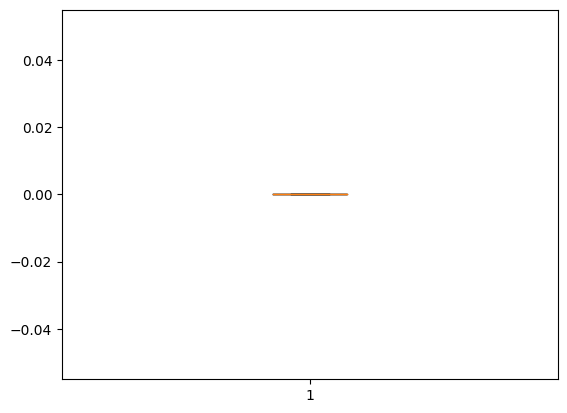

In [ ]:
plt.boxplot(df['Parch'])
plt.show();

In [ ]:
# For Fare

Q1=np.percentile(df['Fare'],25,method='midpoint')
Q2=np.percentile(df['Fare'],50,method='midpoint')
Q3=np.percentile(df['Fare'],75,method='midpoint')

print('Q1 is  ',Q1)
print('Q2 is  ', Q2)
print('Q3 is  ', Q3)

IQR = Q3-Q1

Q1 is   7.9104
Q2 is   14.4542
Q3 is   31.0


In [ ]:
lower_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

print('lower whisker is ',lower_lim)
print('upper whisker is ',Up_lim)


lower whisker is  -26.724
upper whisker is  65.6344


In [ ]:
outliers=[]
for x in df['Fare']:
  if (x<lower_lim) or (x>Up_lim):
    outliers.append(x)
print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [ ]:
df['Fare']=df['Fare'].clip(lower=lower_lim, upper=Up_lim)

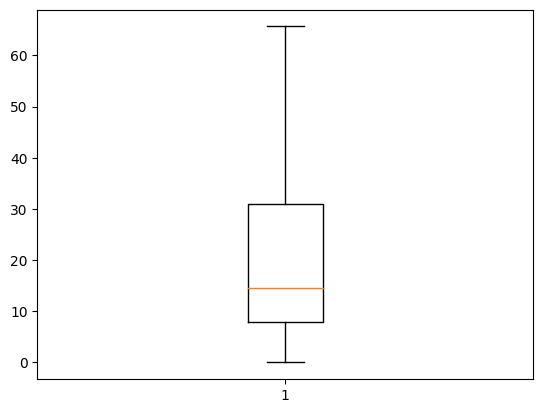

In [ ]:
plt.boxplot(df['Fare'])
plt.show();

Correlation

In [ ]:
df.corr()

<ipython-input-37-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.065857,0.031434,NaN,0.317430
Pclass,-0.338481,1.000000,-0.330962,0.023180,NaN,-0.715300
Age,-0.065857,-0.330962,1.000000,-0.251585,NaN,0.137498
SibSp,0.031434,0.023180,-0.251585,1.000000,NaN,0.349615
Parch,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.317430,-0.715300,0.137498,0.349615,NaN,1.000000


<ipython-input-39-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

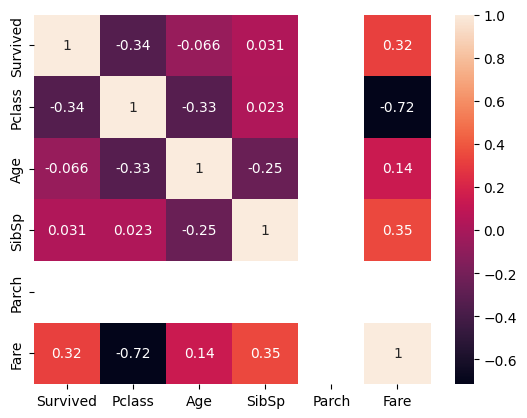

In [ ]:
sns.heatmap(df.corr(),annot=True)

Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 83.5+ KB


In [ ]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
# Label Encoding for Name
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,male,22.0,1.0,0,A/5 21171,7.2500,B96 B98,S
2,1,1,190,female,38.0,1.0,0,PC 17599,65.6344,C85,C
3,1,3,353,female,26.0,0.0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,272,female,35.0,1.0,0,113803,53.1000,C123,S
5,0,3,15,male,35.0,0.0,0,373450,8.0500,B96 B98,S


In [ ]:
df['Sex']=le.fit_transform(df['Sex'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Cabin']=le.fit_transform(df['Cabin'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,1,22.0,1.0,0,523,7.2500,47,2
2,1,1,190,0,38.0,1.0,0,596,65.6344,81,0
3,1,3,353,0,26.0,0.0,0,669,7.9250,47,2
4,1,1,272,0,35.0,1.0,0,49,53.1000,55,2
5,0,3,15,1,35.0,0.0,0,472,8.0500,47,2


Standardized Scaling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int64  
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    float64
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    int64  
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int64  
 10  Embarked  891 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 83.5 KB


In [ ]:
df.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,445.000000,0.647587,29.376817,0.426487,0.0,338.528620,24.046813,53.639731,1.536476
std,0.486592,0.836071,257.353842,0.477990,12.062035,0.708246,0.0,200.850657,20.481625,23.568293,0.791503
min,0.000000,1.000000,0.000000,0.000000,2.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.0,158.500000,7.910400,47.000000,1.000000
50%,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.0,337.000000,14.454200,47.000000,2.000000
75%,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.0,519.500000,31.000000,47.000000,2.000000
max,1.000000,3.000000,890.000000,1.000000,54.500000,2.500000,0.0,680.000000,65.634400,146.000000,2.000000


In [ ]:
X = df.drop(['Name','Sex','Pclass','Parch','Embarked','SibSp'],axis=1)

In [ ]:
X

,Survived,Age,Ticket,Fare,Cabin
PassengerId,,,,,
1,0,22.000000,523,7.2500,47
2,1,38.000000,596,65.6344,81
3,1,26.000000,669,7.9250,47
4,1,35.000000,49,53.1000,55
5,0,35.000000,472,8.0500,47
...,...,...,...,...,...
887,0,27.000000,101,13.0000,47
888,1,19.000000,14,30.0000,30
889,0,29.699118,675,23.4500,47


In [ ]:
X.describe()

,Survived,Age,Ticket,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.376817,338.528620,24.046813,53.639731
std,0.486592,12.062035,200.850657,20.481625,23.568293
min,0.000000,2.500000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,158.500000,7.910400,47.000000
50%,0.000000,29.699118,337.000000,14.454200,47.000000
75%,1.000000,35.000000,519.500000,31.000000,47.000000
max,1.000000,54.500000,680.000000,65.634400,146.000000


In [ ]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc)

In [ ]:
X_sc

,0,1,2,3,4
0,-0.789272,-0.611917,0.918966,-0.820552,-0.281881
1,1.266990,0.715304,1.282625,2.031623,1.161545
2,1.266990,-0.280111,1.646283,-0.787578,-0.281881
3,1.266990,0.466450,-1.442322,1.419297,0.057748
4,-0.789272,0.466450,0.664904,-0.781471,-0.281881
...,...,...,...,...,...
886,-0.789272,-0.197160,-1.183277,-0.539655,-0.281881
887,1.266990,-0.860771,-1.616678,0.290823,-1.003594
888,-0.789272,0.026735,1.676173,-0.029155,-0.281881
889,1.266990,-0.280111,-1.646568,0.290823,0.270017


In [ ]:
X_sc.describe()

,0,1,2,3,4
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,3.987333e-17,7.974666e-18,6.778466e-17,9.968332e-17,1.036707e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-7.892723e-01,-2.229467e+00,-1.686421e+00,-1.174727e+00,-2.277206e+00
25%,-7.892723e-01,-6.119166e-01,-8.968342e-01,-7.882908e-01,-2.818812e-01
50%,-7.892723e-01,2.673527e-02,-7.615002e-03,-4.686152e-01,-2.818812e-01
75%,1.266990e+00,4.664504e-01,9.015306e-01,3.396748e-01,-2.818812e-01
max,1.266990e+00,2.084001e+00,1.701081e+00,2.031623e+00,3.921037e+00


MinMax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_mn = minmax.fit_transform(X)
X_mn = pd.DataFrame(X_mn)

In [ ]:
X_mn.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.516862,0.497836,0.366375,0.367395
std,0.486592,0.231962,0.295369,0.312056,0.161427
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.375000,0.233088,0.120522,0.321918
50%,0.000000,0.523060,0.495588,0.220223,0.321918
75%,1.000000,0.625000,0.763971,0.472313,0.321918
max,1.000000,1.000000,1.000000,1.000000,1.000000


Normalization

In [ ]:
import sklearn
X_norm = sklearn.preprocessing.normalize(X)
X_norm = pd.DataFrame(X_norm)

In [ ]:
X_norm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.001926,0.131038,0.889766,0.119074,0.223946
std,0.003274,0.131485,0.210706,0.167611,0.192779
min,0.000000,0.004026,0.000000,0.000000,0.000000
25%,0.000000,0.051698,0.927048,0.021295,0.094377
50%,0.000000,0.079359,0.983105,0.047712,0.144612
75%,0.002302,0.158411,0.992191,0.109578,0.267534
max,0.020593,0.922835,0.997061,0.921747,0.915667


<function matplotlib.pyplot.show(close=None, block=None)>

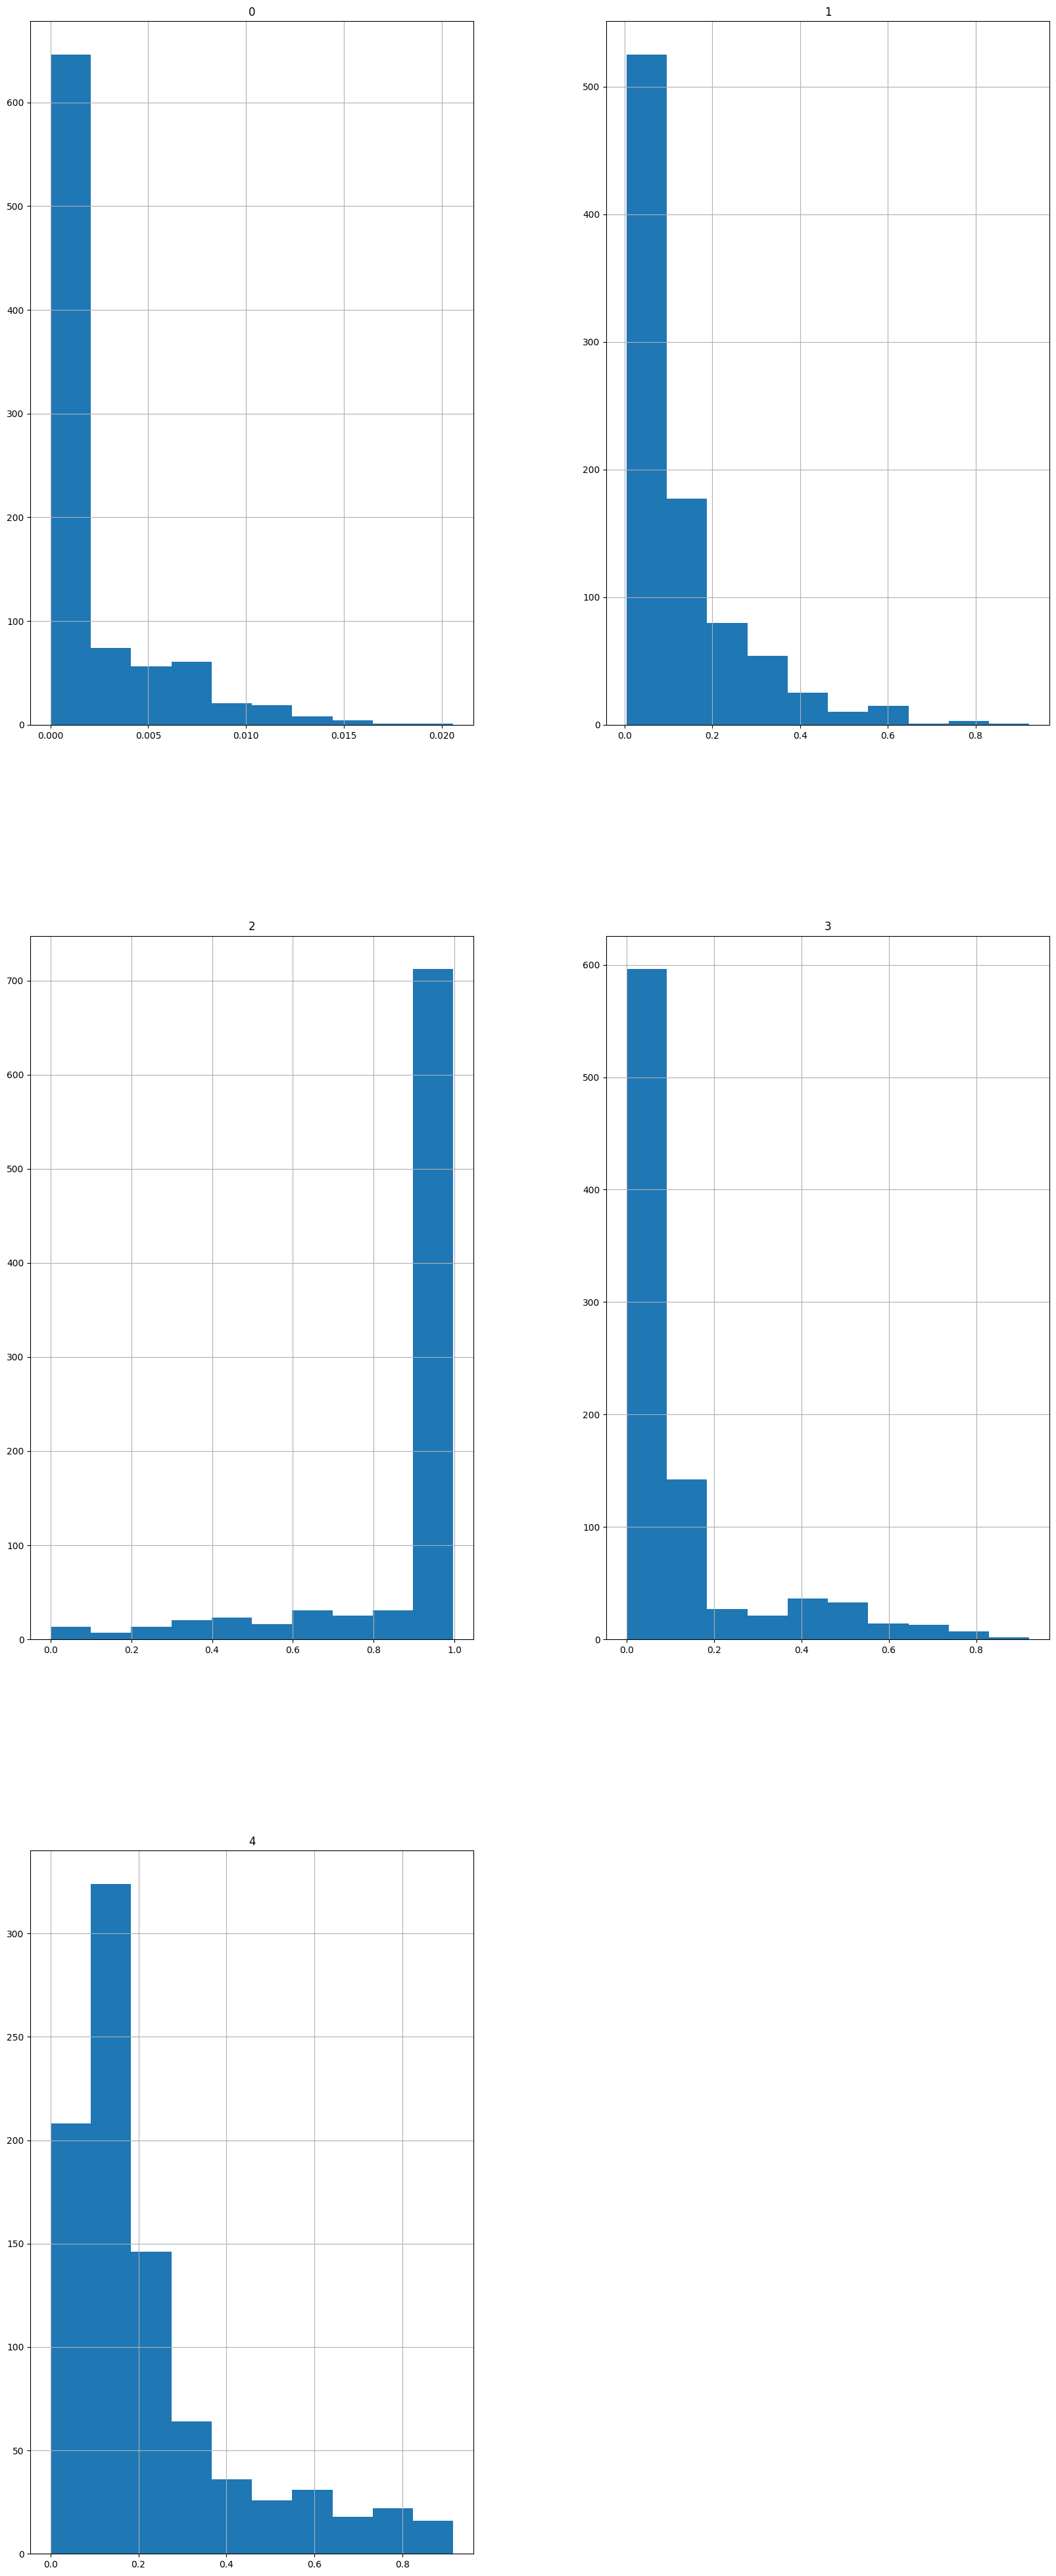

In [ ]:
X_norm.hist(figsize=(20,50))
plt.show

3. Create kNN and SVM models

In [ ]:
y=df['Embarked']
X=df.drop(['Embarked'],axis=1)

In [ ]:
y

PassengerId
1      2
2      0
3      2
4      2
5      2
      ..
887    2
888    2
889    2
890    0
891    1
Name: Embarked, Length: 891, dtype: int64

In [ ]:
X

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
PassengerId,,,,,,,,,,
1,0,3,108,1,22.000000,1.0,0,523,7.2500,47
2,1,1,190,0,38.000000,1.0,0,596,65.6344,81
3,1,3,353,0,26.000000,0.0,0,669,7.9250,47
4,1,1,272,0,35.000000,1.0,0,49,53.1000,55
5,0,3,15,1,35.000000,0.0,0,472,8.0500,47
...,...,...,...,...,...,...,...,...,...,...
887,0,2,548,1,27.000000,0.0,0,101,13.0000,47
888,1,1,303,0,19.000000,0.0,0,14,30.0000,30
889,0,3,413,0,29.699118,1.0,0,675,23.4500,47


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [ ]:
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_log_pred=log_reg.predict(X_test)

In [ ]:
y_log_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

KNN Model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [ ]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred_knn=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

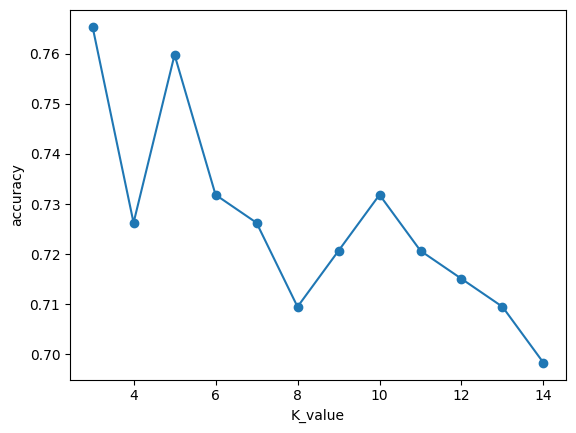

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_pred_knn))
print("Precision Score : ",precision_score(y_test, y_pred_knn,
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred_knn,
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred_knn,
                                           pos_label='positive',
                                           average='micro'))

Accuracy : 0.6983240223463687
Precision Score :  0.6983240223463687
Recall Score :  0.6983240223463687
F1 Score :  0.6983240223463687


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


SVM model

In [ ]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = sv_cl.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy is :', accuracy_score(y_test,y_pred))

Accuracy is : 0.664804469273743


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[  0   0  43]
 [  0   0  17]
 [  0   0 119]]


4. Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,1,22.000000,1.0,0,523,7.2500,47,2
2,1,1,190,0,38.000000,1.0,0,596,65.6344,81,0
3,1,3,353,0,26.000000,0.0,0,669,7.9250,47,2
4,1,1,272,0,35.000000,1.0,0,49,53.1000,55,2
5,0,3,15,1,35.000000,0.0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,548,1,27.000000,0.0,0,101,13.0000,47,2
888,1,1,303,0,19.000000,0.0,0,14,30.0000,30,2
889,0,3,413,0,29.699118,1.0,0,675,23.4500,47,2


In [ ]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [ ]:
#hold out cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [ ]:
log_model=log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
score_log=log_model.score(X_test,y_test)

In [ ]:
score_log

0.664804469273743

K-Fold

In [ ]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [ ]:
for train_index,test_index in kfold_validator.split(X,y):
  print('train_index:',train_index)
  print('test_index:',test_index)


train_index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 3

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score=cross_val_score(log_model,X,y,cv=kfold_validator)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
cv_score

array([0.68888889, 0.7752809 , 0.74157303, 0.68539326, 0.71910112,
       0.69662921, 0.71910112, 0.71910112, 0.74157303, 0.71910112])

In [ ]:
cv_score.mean()

0.7205742821473159

Stratified cv

In [ ]:
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)

In [ ]:
cv_score_sr=cross_val_score(log_model,X,y,cv=kfold_validator)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
for train_index,test_index in stratified_cv.split(X,y):
  print('train_index:',train_index)
  print('test_index:',test_index)

train_index: [ 65  73  82  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 3

In [ ]:
cv_score_sr

array([0.68888889, 0.7752809 , 0.74157303, 0.68539326, 0.71910112,
       0.69662921, 0.71910112, 0.71910112, 0.74157303, 0.71910112])

In [ ]:
cv_score_sr.mean()

0.7205742821473159